# Redes neurais 
Teórico

## Introdução

- nos baseamos na biologia neural humana, simula os neuronios e as conexões entre eles;
- **muitos dados e problemas muito complexos**, deep learning;
- problemas que nao há um algoritmo pre determinado, onde nao podemos simplesmente seguir um "caminho" e sempre vai ser a mesma coisa;
- usado em inumeras areas da modernidade, como entendimento de linguagem natural, carros autonomos, reconhecimento facial, bola de valores, soluções para trafego;
- para problemas mais simples, geralmente nao se deve usar redes neurais;



## Fundamentos biologicos

- neuronios trocam informações entre eles
- fornece um valor de entrada, a rede processa e retorna uma saida
- o neuronio so é ativado se o valor for maior que o **limiar**
- entrada ---> (neuronios e axonios) ---> saida

## Neuronio artificial

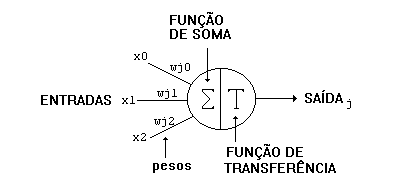

**Função soma** 
- é a soma dos Xn * Wn, ou seja, o somatorio da multiplição das entradas e dos pesos
- as entradas são os atributos, os pesos são o que o modelo vai aprender

**Função de transferencia**
- a partir do somatorio das entradas vai retornar uma saida, a regra dessa saida depende de qual função estamos utilizando
- existem inumeras funções de transferencia, uma delas é o step
- Step function: se o resuldado da função soma for maior ou igual a 1, retorna 1, senão retorna 0
- O neuronio em questão so vai ser ativado se a step retornar 1

*obs*
- peso positivo: sinapse exitadora - aumenta o potencial de ativação do neuronio
- peso negativo: sinapse inibidora
- pesos são as sinapses
- pesos amplificam ou reduzem os sinais de entrada
- **o que a rede neural vai aprender são o conjunto de pesos para cada um dos atributos para uma determinada base de dados**

## Tipos de aprendizagem de maquina

**supervisionada**
- classificação, regressão


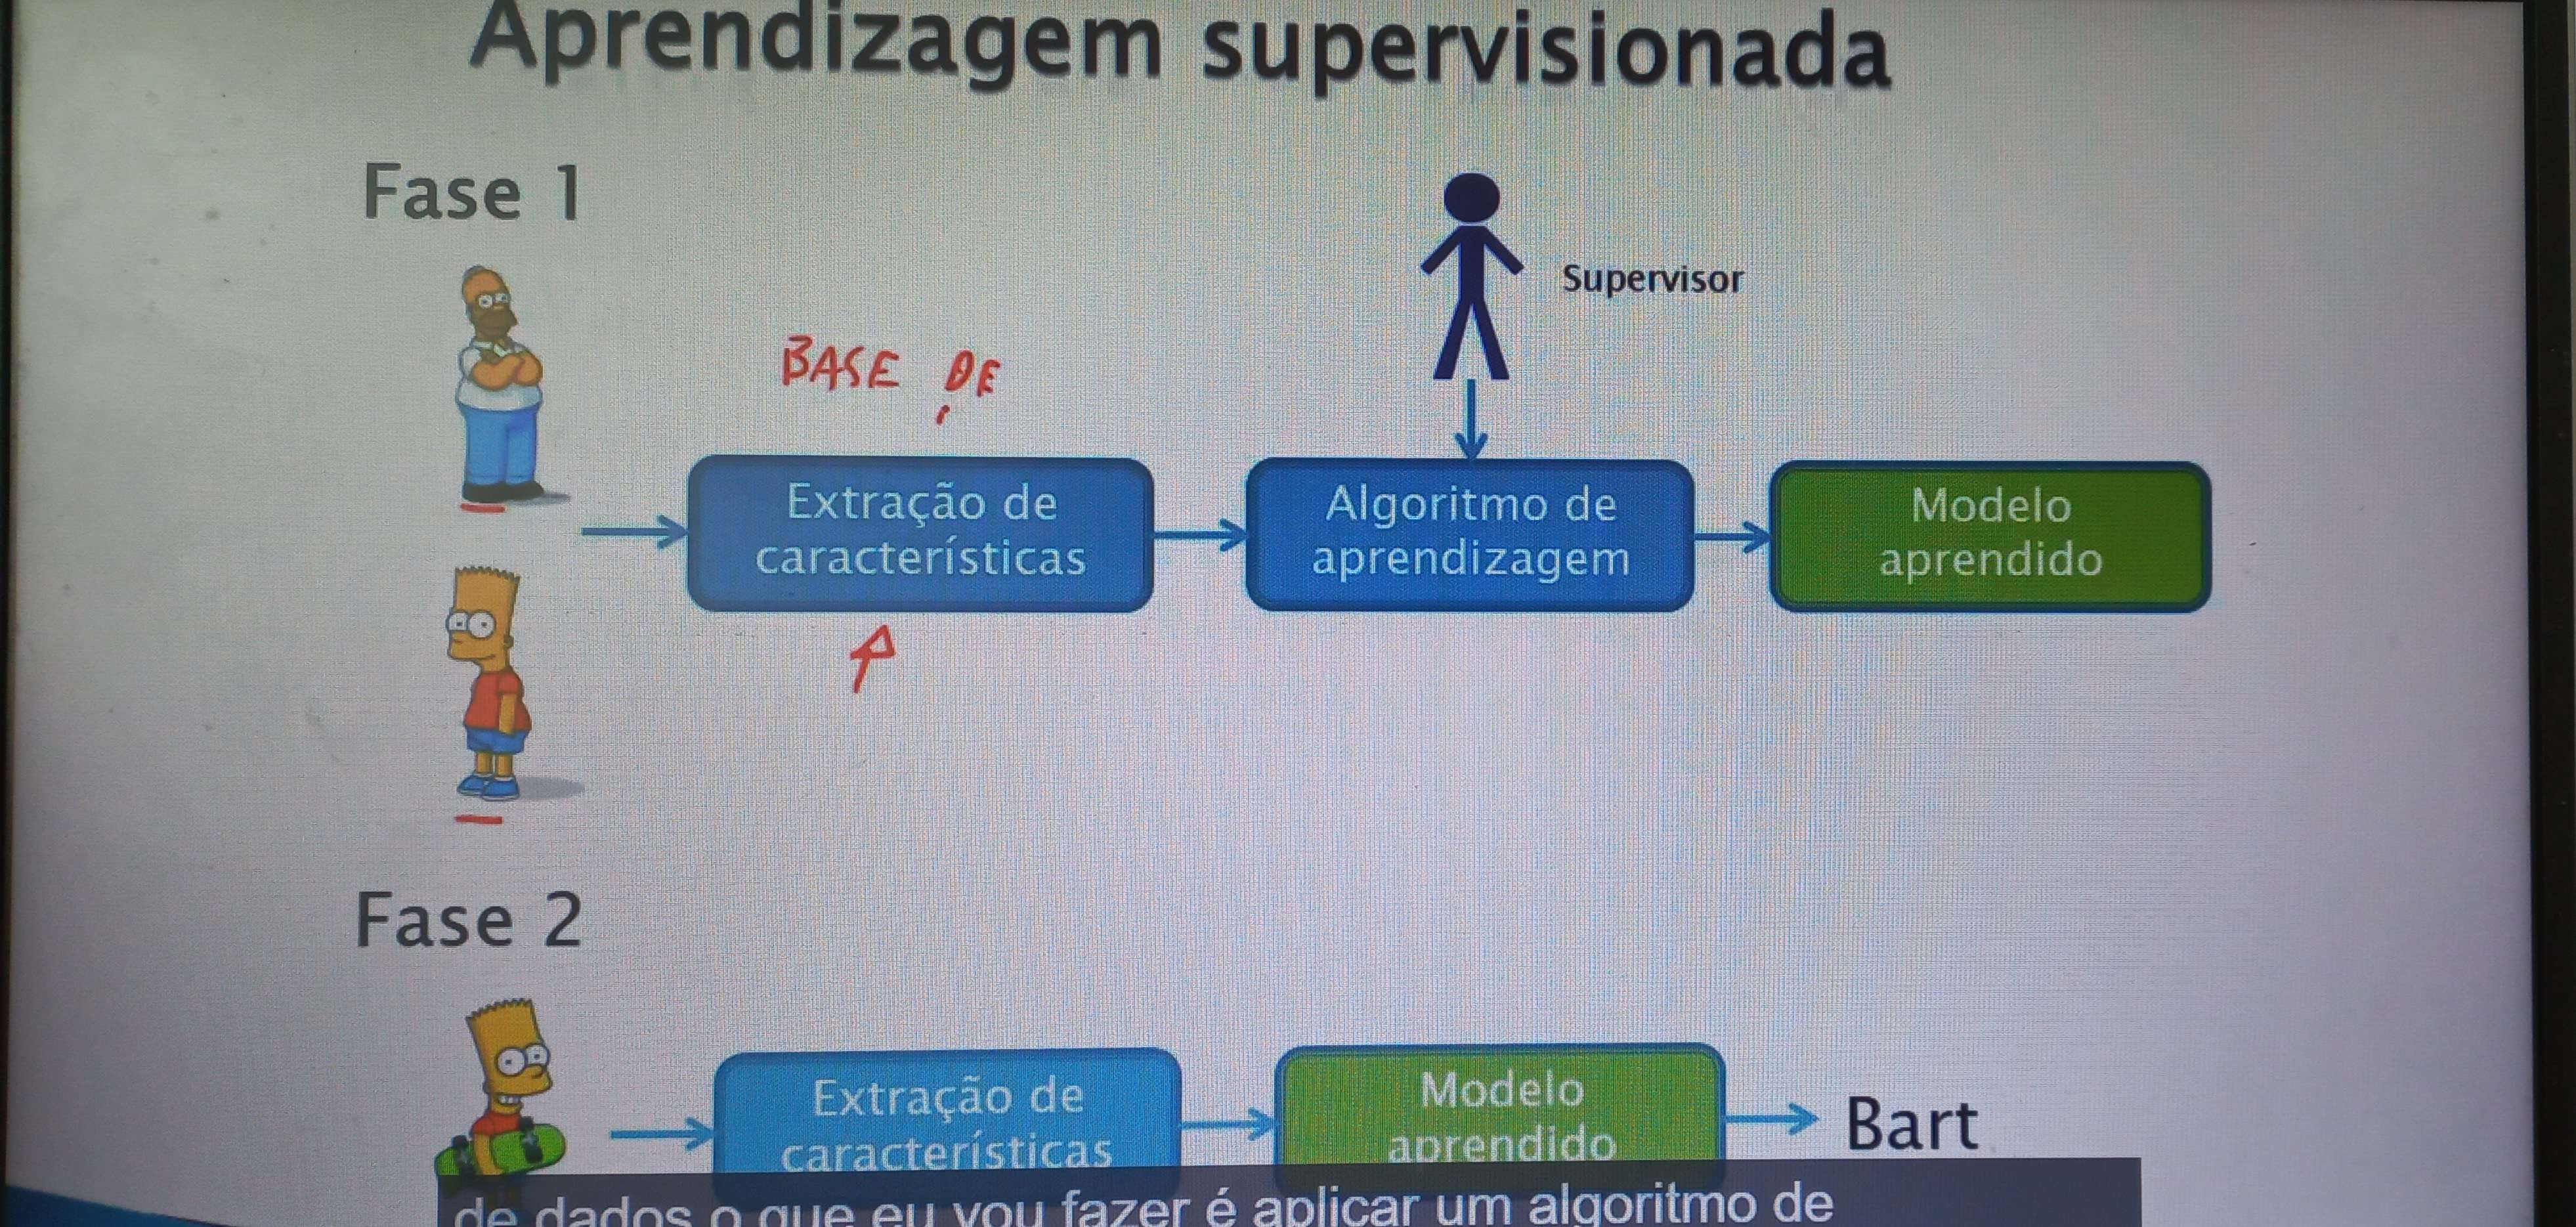

- Na fase 1, o supervisor informa ao modelo as classes que cada imagem pertence, para que ele possa treinar o modelo
- a primeira fase é a fase de treino, onde o modelo precisa dos atributos previsores e o alvo, enquanto em nao supervisionado ele so precisa dos previsres 

**nao supervisionada**
- associação
- agrupamento
- deteccção de desvios
- padrões sequenciais
- sumarização

- Analisa automaticamente os dados e os divide em grupos, nao precisando ter a figura do supervisor
- nao disponibilizaremos o atributo alvo

**reforço**
- aprende com interações com ambiente
- aprende com sua propria experiencia

## Ajuste de pesos

**ajustando o peso** 
- **erro = Resposta_correta - resposta_calculada**
- calcula o peso para todos os registros e depois tiramos a media
- esse erro é relacionado a alguma previsão que deu errado, ex: queriamos 1 e deu 0, erro = 1
- **peso_novo = peso_antigo + (taxa_aprendizagem * entrada * erro)**
- taxa_aprendizagem é um valor fixo que diz o quanto a rede vai evoluir, o quanto o peso vai aumentar
- é calculado o peso_novo para cada atributo


## Redes neurais multicamadas(feed forward)

*uma camada é usado apenas para problemas lineramente separavéis*

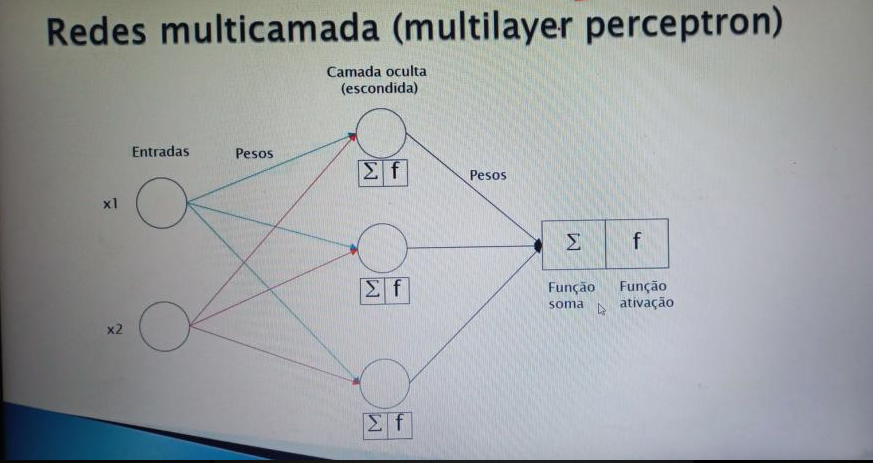

- As entradas de cada neuronio da camada ocuta vai ser a multiplicação de cada atributo pelo peso do axonio em questao
- As entradas do neuronio final são as saidas do neuronio da camada oculta

## Funções de ativação

Quando o valor da saida de uma função for continuo, esperamos que ele fique extremamente proximo do valor real que deveria assumir, ou seja, o mais proximo de 0, 1, 2, 3, ... n, os numeros variam a depender de quantas classes o nosso modelo tem

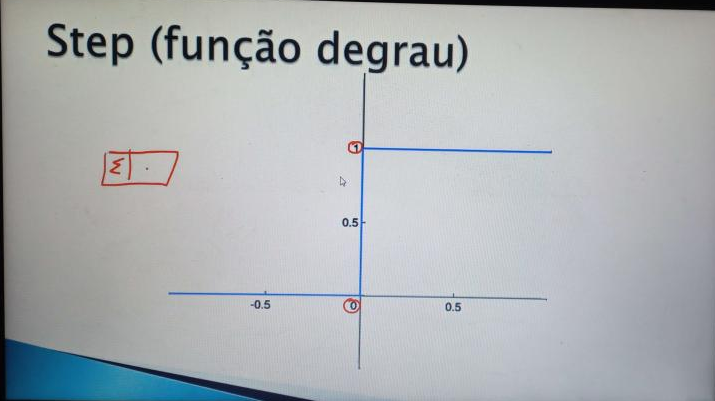

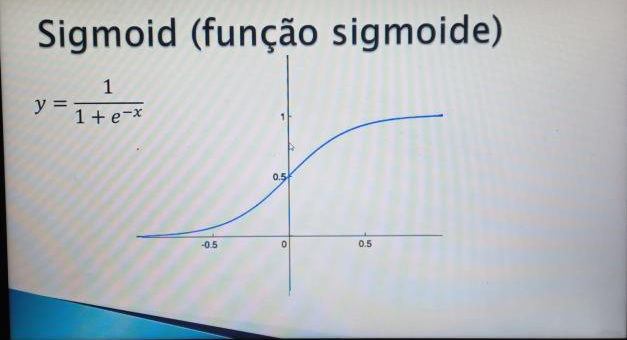

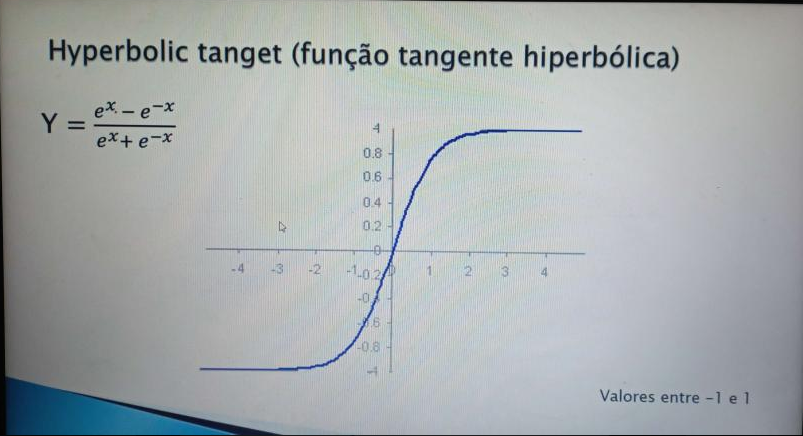

Existem inumeras outas funções de ativação que podem ser implementadas em redes neurais

## calculo de novos pesos em multicamadas

**1. descida do gradiente**
- queremos diminuir o erro ate chegar no ponto minimo global como abaixo:
- vamos alterando os pesos ate chegar no objetivo
- fazemos o calculo da derivada parcial para chegar mais proximo do gradiente, ou seja, calcular o declive da curva, para irmos na direção correta
- gradiente é calculado para saber quanto ajustar os erros

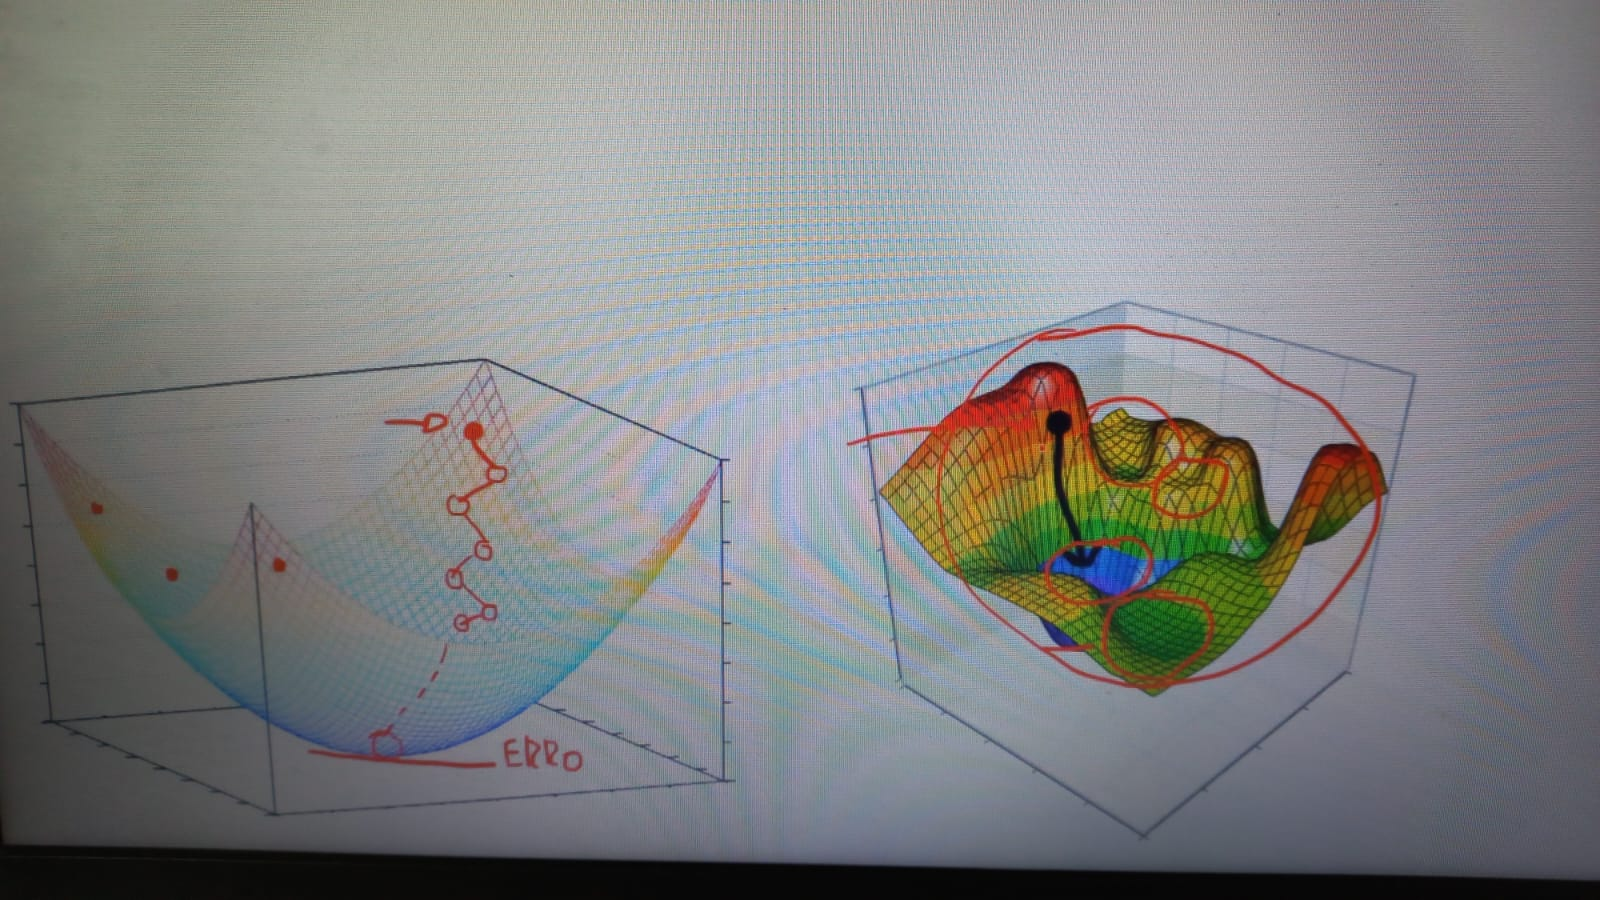

**2. cálculo do delta**
- delta indica a melhor direção para irmos e fazermos as atualizaçoes dos pesos
- Delta_saida = erro * derivada_função_ativação(o delta da camada de saida vai ser calculado a partir da multiplicação do erro pela derivada da função de ativação, jogamos o resultado da soma na formula da derivadsa da função)
- Delta_escondida = Derivada_funçõa_ativação * peso * delta+Saida

**3. backpropagation, learning rate, momentum**
- o backpropagation é o algoritmo que vai fazer as atualizações dos pesos
- Peso n+1 = (Peso N * momentum) + (entrada * delta * learning rate)
- taxa de aprendizagem define o quao rapido o algoritmo vai aprender

## Bias e erros

- bias, ou vies, coloca um atributo a mais a cada uma das camadas, fazendo com que o modelo tenha uma maior eficiencia
- **MSE**: Mean square error, é o erro elevado ao quadrado, eliminando valores negativos, penaliza os erros maiores, uma vez que vao ter um peso maior
- **RMSE**: Root Mean Square Error. é a raiz do MSE, deixando menos evidente a penalização dos erros do MSE


## Saida com mais neuronios e deep learning

- quando tivermos a saida de mais de 1 neuronio, temos que correlacionar os dois em relação a saida
- Cada neuronio vai representar uma classe, ou seja, uma resposta
- se as classes que queremos prever sao caracteres = (a,b,c), cada neuronio de saida vai representar uma dessas classes
- rede neural pode ser considerada deep learning caso tenam duas ou mais camadas escondidas

## Camada oculta

- Neuronios_camada_oculta = (Entrada + saida) / 2
- Em geral, duas camadas funcionam bem para pooucos dados
- validação cruzada


# Redes neurais
Prático

## BAse credito - 0.998

In [ ]:
import pickle
with open('/content/drive/MyDrive/Machine Learning e Data Science com Python de A a Z/01. Classificação /credit.pkl', 'rb') as f:
  X_credit_train, X_credit_test, y_credit_train, y_credit_test = pickle.load(f)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
X_credit_train.shape


(1500, 3)

queremos diminuir o valor do erro, e podemos perceber o valor do erro a cada iteração abaixo

In [ ]:
# com o default: Maximum iterations (200) reached and the optimization hasn't converged yet. -> significa que podemos rodar por mais epocas para atingir o objetivo
# 1000 epocas: Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping. -> o erro nao diminuiu significamente a pártir da iteração 389
# Diminuindo o erro tolerado: Maximum iterations (1000) reached and the optimization hasn't converged yet. -> mesmo com 1000 epocas, nao cchegamos no erro
# Por fim aumentamos para 1500 para melhorar, mesmo que nao seja muito, o erro
rede_neural_credit = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000100, activation='relu', hidden_layer_sizes= (2, 2)) # Tol determina o erro o rede neural deve tolerar, hidden indica a quantidade de neuronios em cada camada oculta
rede_neural_credit.fit(X_credit_train, y_credit_train)

Iteration 1, loss = 0.87412273
Iteration 2, loss = 0.86431235
Iteration 3, loss = 0.85469358
Iteration 4, loss = 0.84544018
Iteration 5, loss = 0.83640423
Iteration 6, loss = 0.82751172
Iteration 7, loss = 0.81891468
Iteration 8, loss = 0.81031941
Iteration 9, loss = 0.80195944
Iteration 10, loss = 0.79366155
Iteration 11, loss = 0.78558867
Iteration 12, loss = 0.77754306
Iteration 13, loss = 0.76942526
Iteration 14, loss = 0.76143292
Iteration 15, loss = 0.75336636
Iteration 16, loss = 0.74541976
Iteration 17, loss = 0.73715672
Iteration 18, loss = 0.72900874
Iteration 19, loss = 0.72070075
Iteration 20, loss = 0.71218650
Iteration 21, loss = 0.70363059
Iteration 22, loss = 0.69496738
Iteration 23, loss = 0.68636388
Iteration 24, loss = 0.67773529
Iteration 25, loss = 0.66901602
Iteration 26, loss = 0.66003271
Iteration 27, loss = 0.65130011
Iteration 28, loss = 0.64223202
Iteration 29, loss = 0.63326955
Iteration 30, loss = 0.62394356
Iteration 31, loss = 0.61476300
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(2, 2), max_iter=1500, tol=1e-05, verbose=True)

In [ ]:
previsoes = rede_neural_credit.predict(X_credit_test)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_test, previsoes)


0.998

In [ ]:
print(classification_report(y_credit_test, previsoes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       436
           1       0.98      1.00      0.99        64

    accuracy                           1.00       500
   macro avg       0.99      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



0.998

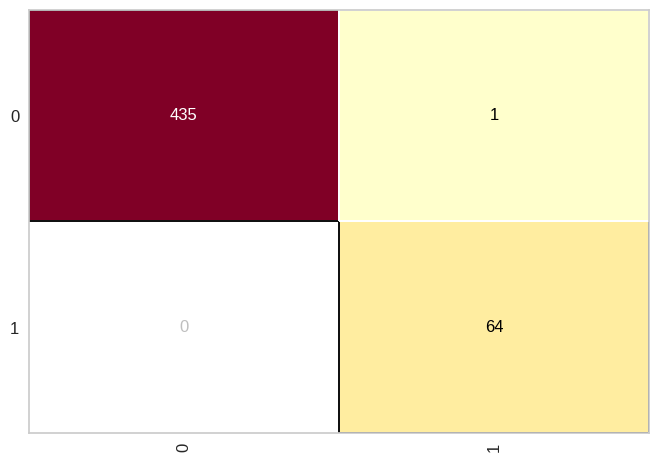

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural_credit)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)

## Base census

In [ ]:
with open('/content/drive/MyDrive/Machine Learning e Data Science com Python de A a Z/01. Classificação /census.pkl', 'rb') as f:
  X_census_train, X_census_test, y_census_train, y_census_test = pickle.load(f)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Machine Learning e Data Science com Python de A a Z/Bases de dados/census.csv')
df.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# em problemas que nao sao tao complexos, 2 camadas sao suficientes
rede_neural_census = MLPClassifier(max_iter=1000, verbose=True,  tol = 0.000010, hidden_layer_sizes = (55, 55))
rede_neural_census.fit(X_census_train, y_census_train)

Iteration 1, loss = 0.41931043
Iteration 2, loss = 0.32978923
Iteration 3, loss = 0.31715317
Iteration 4, loss = 0.30876903
Iteration 5, loss = 0.30348819
Iteration 6, loss = 0.29864830
Iteration 7, loss = 0.29536188
Iteration 8, loss = 0.29317292
Iteration 9, loss = 0.29028176
Iteration 10, loss = 0.28782728
Iteration 11, loss = 0.28530049
Iteration 12, loss = 0.28325214
Iteration 13, loss = 0.28151724
Iteration 14, loss = 0.27937746
Iteration 15, loss = 0.27759969
Iteration 16, loss = 0.27604110
Iteration 17, loss = 0.27415206
Iteration 18, loss = 0.27293221
Iteration 19, loss = 0.27158500
Iteration 20, loss = 0.26949691
Iteration 21, loss = 0.26806872
Iteration 22, loss = 0.26714207
Iteration 23, loss = 0.26523726
Iteration 24, loss = 0.26366110
Iteration 25, loss = 0.26237359
Iteration 26, loss = 0.26128209
Iteration 27, loss = 0.25936111
Iteration 28, loss = 0.25806302
Iteration 29, loss = 0.25652638
Iteration 30, loss = 0.25534720
Iteration 31, loss = 0.25397017
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(55, 55), max_iter=1000, tol=1e-05,
              verbose=True)

In [ ]:
previsoes = rede_neural_census.predict(X_census_test)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [ ]:
y_census_test

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
accuracy_score(y_census_test, previsoes)

0.8163766632548618

In [ ]:
print(classification_report(y_census_test, previsoes))

              precision    recall  f1-score   support

       <=50K       0.87      0.88      0.88      3693
        >50K       0.63      0.61      0.62      1192

    accuracy                           0.82      4885
   macro avg       0.75      0.75      0.75      4885
weighted avg       0.81      0.82      0.82      4885



0.8163766632548618

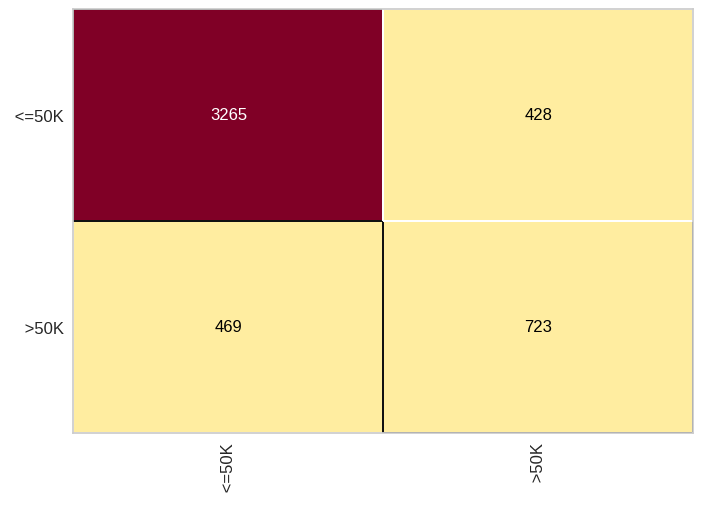

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural_census)
cm.fit(X_census_train, y_census_train)
cm.score(X_census_test, y_census_test)